In [162]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from torch import nn
import torch


In [163]:
df = pd.read_csv('mushrooms.csv')

In [164]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le = {column : LabelEncoder() for column in df}

In [167]:
for column, encoder in le.items():
    encoder.fit(df[column])
    df[column] = encoder.transform(df[column])

In [168]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [169]:
y = df['class']

In [170]:
X = df.drop('class', axis = 1)

In [171]:
X = X.to_numpy()

In [172]:
y = y.to_numpy()

In [173]:
X = torch.tensor(X).type(torch.float)

In [174]:
y = torch.tensor(y).type(torch.float)

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [177]:
model = nn.Sequential(
    nn.Linear(in_features=22, out_features=50),
    nn.Linear(in_features=50, out_features=1)
)

In [178]:
model

Sequential(
  (0): Linear(in_features=22, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=1, bias=True)
)

In [179]:
loss_fn = nn.BCEWithLogitsLoss()

In [180]:
optim = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [181]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [182]:
torch.manual_seed(101)

epochs = 500

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(torch.sigmoid(y_logits), y_train)
    acc = accuracy_fn(y_train, y_pred)
    optim.zero_grad()
    loss.backward()
    optim.step

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
    if epoch % 10 == 0:
        print(f' epoch:{epoch} | loss:{loss} | accuracy:{acc}')
        



 epoch:0 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:10 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:20 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:30 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:40 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:50 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:60 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:70 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:80 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:90 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:100 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:110 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:120 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:130 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:140 | loss:0.7353195548057556 | accuracy:48.49976919526081
 epoch:150 | loss:0.7

try  to use one hot encoder

In [113]:
df = pd.read_csv('mushrooms.csv')

In [114]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [115]:
df = pd.get_dummies(data=df, drop_first=True, dtype=int)

In [116]:
df

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [117]:
X = df.drop('class_p', axis = 1)

In [150]:
y = df['class_p']

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

In [121]:
scaled_X = scaler.fit_transform(X)

In [122]:
from sklearn.decomposition import PCA


In [123]:
pca_model = PCA()

In [124]:
sum = []
for n in range(1, 95):
    pca_model = PCA(n_components=n)
    pca_data = pca_model.fit_transform(scaled_X)
    sum.append(np.sum(pca_model.explained_variance_ratio_))


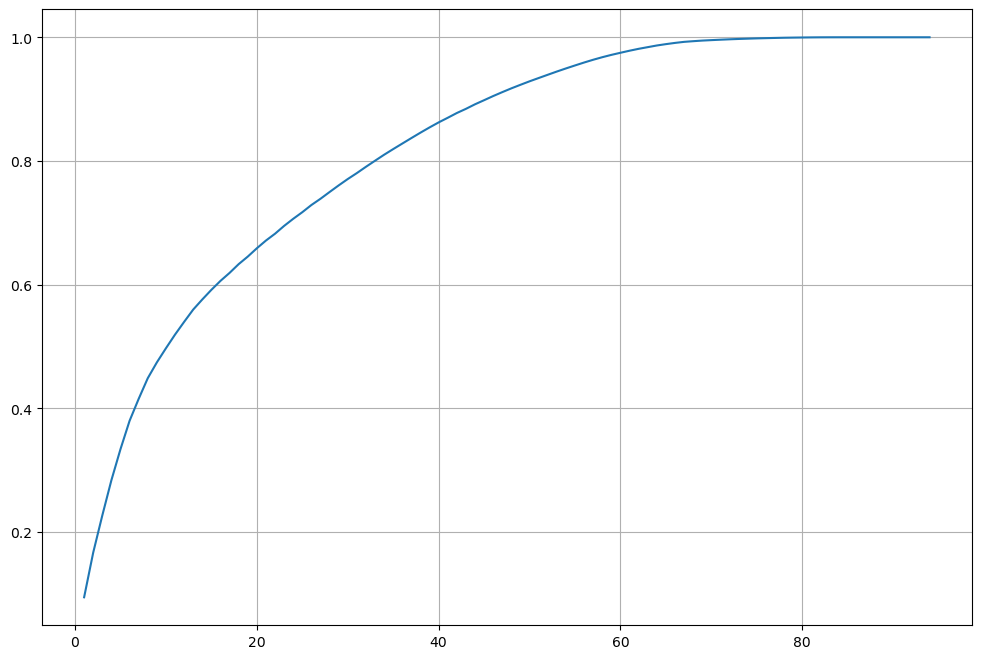

In [125]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.plot(range(1, 95), sum)

In [126]:
pca_model = PCA(n_components=46)

In [149]:
X = pca_model.fit_transform(scaled_X)

In [130]:
round(np.sum(pca_model.explained_variance_ratio_), 4)

0.9049

In [151]:
X = torch.tensor(X).type(torch.float)

In [152]:
y = torch.tensor(y).type(torch.float)

In [145]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [137]:
model = nn.Sequential(nn.Linear(in_features=46, out_features=20), nn.Linear(in_features=20, out_features=1))

In [139]:
model

Sequential(
  (0): Linear(in_features=46, out_features=20, bias=True)
  (1): Linear(in_features=20, out_features=1, bias=True)
)

In [140]:
loss_fn = nn.BCELoss()

In [142]:
optim = torch.optim.Adam(params=model.parameters(), lr = 0.01)

In [157]:
torch.manual_seed(101)

epochs = 500

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(torch.sigmoid(y_logits), y_train)
    acc = accuracy_fn(y_train, y_pred)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if epoch % 10 == 0:
        print(f'Epoch:{epoch},   Loss:{loss:.5f},   Accuracy: {acc:.2f}')

Epoch:0,   Loss:0.63296,   Accuracy: 68.27
Epoch:10,   Loss:0.12788,   Accuracy: 99.43
Epoch:20,   Loss:0.02228,   Accuracy: 99.97
Epoch:30,   Loss:0.00783,   Accuracy: 99.97
Epoch:40,   Loss:0.00477,   Accuracy: 99.97
Epoch:50,   Loss:0.00365,   Accuracy: 99.97
Epoch:60,   Loss:0.00308,   Accuracy: 99.97
Epoch:70,   Loss:0.00273,   Accuracy: 99.97
Epoch:80,   Loss:0.00245,   Accuracy: 99.97
Epoch:90,   Loss:0.00223,   Accuracy: 99.97
Epoch:100,   Loss:0.00205,   Accuracy: 99.97
Epoch:110,   Loss:0.00188,   Accuracy: 99.97
Epoch:120,   Loss:0.00174,   Accuracy: 99.97
Epoch:130,   Loss:0.00161,   Accuracy: 99.98
Epoch:140,   Loss:0.00150,   Accuracy: 99.98
Epoch:150,   Loss:0.00140,   Accuracy: 99.98
Epoch:160,   Loss:0.00131,   Accuracy: 99.98
Epoch:170,   Loss:0.00122,   Accuracy: 99.98
Epoch:180,   Loss:0.00114,   Accuracy: 100.00
Epoch:190,   Loss:0.00107,   Accuracy: 100.00
Epoch:200,   Loss:0.00101,   Accuracy: 100.00
Epoch:210,   Loss:0.00095,   Accuracy: 100.00
Epoch:220,   Loss

In [158]:
test_logits = model(X_test)
test_pred = torch.round(torch.sigmoid(test_logits))

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
print(confusion_matrix(y_test.detach().numpy(), test_pred.detach().numpy()))
print(classification_report(y_test.detach().numpy(), test_pred.detach().numpy()))

[[851   0]
 [  0 774]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       851
         1.0       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

